# The Alcubierre Metric

The Alcubierre metric is the crucial spacetime metric on which Project Elära's research builds on. At the highest level, it is a spacetime metric that allows for the possibility of faster-than-light interstellar travel. By causing the expansion of spacetime in front of, and the contraction of spacetime behind, an isolated "shell region" of spacetime, the metric allows the "shell region" to move at an arbritrary speed.

## Derivation of the Alcubierre Metric

It is important to note here that this derivation is not a "derivation" in the strictest sense. This is because the Alcubierre Metric is more so a constructed rather than derived metric found by solving the Einstein Field Equations for a specific stress-energy tensor.

Alcubierre constructed his metric from the general form of all metrics in the ADM formalism:

$$
ds^2 = -(\alpha^2 - \beta_i\beta^i)dt^2 + 2\beta_i dx^i dt + \gamma_{ij}dx^i dx^j
$$

Then, by choosing $\alpha = 1$, $\beta^x = -v_s (t) f(r_s)$, $\beta^y = \beta^z = 0$, and setting $\gamma_{ij}$ to the Euclidean metric tensor $\delta_{ij}$, we arrive at:

$$
ds^2 = -(1 + v_s(t) f(r_s))^2 dt^2 + (2 v_s(t) f(r_s))dx dt + dx^2 + dy^2+ dz^2
$$

After simplifying the terms we arrive at the metric:

$$
ds^2 = -dt^2 + (dx - v_s f(r_s(t)) dt)^2 + dy^2 + dz^2
$$

Where $x_s(t)$ is a function of the spacecraft's position over time, and $f (r_s(t))$ is a "top hat" shaping function $f (r_s(t))$ to modify the metric such that it would vanish where $r_s > R$:

$$
f (r_s(t)) = \frac{\tanh \sigma(r_s(t) + R) - \tanh \sigma(r_s(t) - R)}{2 \tanh \sigma R}
$$

$$
r_s(t) = \sqrt{(x - x_s(t))^2 + y^2 + z^2}
$$

$$
v_s(t) = \frac{dx_s (t)}{dt}
$$

## York Time and Energy Density

Here, we'll derive the the spacetime expansion/contraction and energy density associated with the (original) Alcubierre metric. Remember that the line element of the Alcubierre metric is given by:

$$
ds^2 = -dt^2 + (dx - v_s f(r_s(t)) dt)^2 + dy^2 + dz^2
$$

So we can write out the Alcubierre metric tensor in matrix form as:

$$
g_{\mu \nu} = 
\begin{bmatrix}
v_s^2 f(r_s)^2 & -v_s f(r_s) & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
$$

Now, we can calculate the expansion and contraction of space resultant from the metric - the magnitude of which is termed the **York Time**. The trace of the extrinsic curvature tensor $K_{ij}$ is given by:

$$
K^i{}_j = \partial_j X^i
$$

For the Alcubierre metric, this would be:

$$
K^i{}_j = v_s \frac{x_s}{r_s} \frac{df(r_s)}{dr_s}
$$

The above expression for the York Time gives the magnitude of the spacetime expansion and contraction, and we will refer to it with $\theta$ from this point on:

$$
\theta = v_s \frac{x_s}{r_s} \frac{df(r_s)}{dr_s}
$$

Below, a plot of the York time with $v_s = c$, $\sigma = 8$ and a 2-meter radius warp shell is shown:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def f_rs(r_s, sigma=8, R=2):
    return (np.tanh(sigma * (r_s + R)) - np.tanh(sigma * (r_s - R)))/(2 * np.tanh(sigma * R))

def df_rs(r_s, sigma=8, R=2):
    return (sigma * (np.tanh(sigma * (R - r_s)) ** 2 - np.tanh(sigma * (R + r_s)) ** 2)) / (2 * np.tanh(sigma * R))

def d_rs(x, rho, x_s=2.5):
    # rho is y and z "squashed together"
    return ((x - x_s)**2 + rho**2)**(1/2)

def theta(x, rho, x_s=2.5, v_s=1, sigma=8, R=2):
    drs = d_rs(x, rho, x_s)
    dfrs = df_rs(drs, sigma, R)
    return v_s * ((x - x_s) / drs) * dfrs

def alcubierre_plt(width, height, samples=160):
    x = np.linspace(1.0, 8.0, num=samples)
    p = np.linspace(-4.0, 4.0, num=samples)

    # Generate coordinate matrices from coordinate vectors.
    X, P = np.meshgrid(x, p)

    # Get york time
    Z = theta(X, P, x_s = 5)
    
    # Create the Figure.
    fig = plt.figure(figsize=(width, height))
    ax = plt.axes(projection='3d')

    # Set the angle of the camera
    ax.view_init(25, -45)

    # Add latex math labels.
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$\rho$')
    ax.set_zlabel(r'$\theta$')

    # Set the axis limits
    ax.set_xlim(1.0, 8.0)
    ax.set_ylim(-4, 4)
    ax.set_zlim(-4.2, 4.2)
    
    # Plot the Surface.
    ax.plot_wireframe(X, P, Z, rstride=2, cstride=2, linewidth=0.5, antialiased=True, color='gray')
    plt.show()

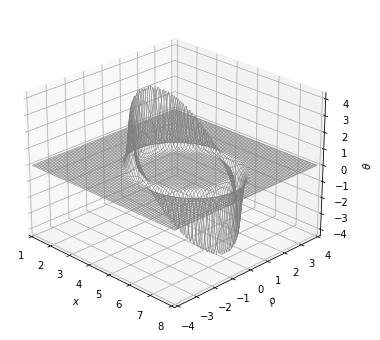

In [62]:
alcubierre_plt(12, 6)

Here, we can see that the metric induces a contraction of spacetime in front and an expansion of spacetime behind the spacecraft.

Now, we can calculate the energy density. Returning to the metric, we know that we can calculate the stress-energy tensor from the metric. Taking the first component of the stress-energy tensor - that is, $T_{00}$ - yields the energy density:

$$
T_{00} = -\frac{1}{8\pi} \frac{(v_s)^2 (y^2 + z^2)}{4 (r_s)^2} \left(\frac{df(r_s)}{dr_s}\right)^2
$$

```{note}
Here $G = c = 1$, which is the standard when using the ADM formalism.
```

The energy density distribution is orthogonal to the direction of the spacecraft's movement, as shown in the plot below:

In [85]:
def energy_density(x, rho, x_s=2.5, v_s=1, sigma=8, R=1):
    r_s = ((x - x_s)**2 + rho**2)**(1/2)
    drs = d_rs(x, rho, x_s)
    dfrs = df_rs(drs, sigma, R)
    return (-1/(8 * np.pi)) * ((v_s ** 2 * rho ** 2)/(4 * r_s ** 2)) * ((dfrs / drs) ** 2)

def energy_density_plt(width, height, samples=160):
    x = np.linspace(1.0, 8.0, num=samples)
    p = np.linspace(-4.0, 4.0, num=samples)

    # Generate coordinate matrices from coordinate vectors.
    X, P = np.meshgrid(x, p)

    # Get york time
    Z = energy_density(X, P, x_s = 5)
    
    # Create the Figure.
    fig = plt.figure(figsize=(width, height))
    ax = plt.axes(projection='3d')

    # Set the angle of the camera
    ax.view_init(25, -45)

    # Add latex math labels.
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$\rho$')
    ax.set_zlabel(r'$T_{00}$')

    # Set the axis limits
    ax.set_xlim(1.0, 8.0)
    ax.set_ylim(-4, 4)
    ax.set_zlim(-4, 4)
    
    # Plot the Surface.
    ax.plot_surface(X, P, Z, alpha=1, cstride=2, rstride=2, linewidth=0.1, cmap=plt.cm.coolwarm)
    plt.show()

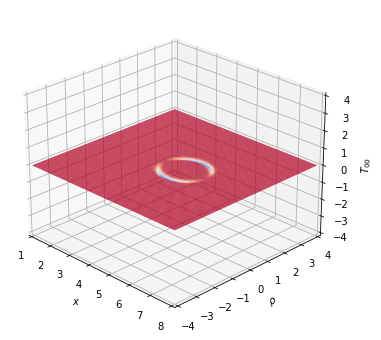

In [86]:
energy_density_plt(12, 6, samples=320)

The energy density graph, unfortunately, disguises perhaps _the_ most important issue with the Alcubierre metric: energy requirements. I will spare a full calculation of the energy requirements, but past research has shown that a 100-meter radius warp shell would require a total negative energy of:

$$
E \approx -6.2 \times 10^{62} \mathrm{\ kg}
$$

For perspective, let's consider an idealized version of the Casimir effect of quantum mechanics, which has been shown to produce negative energy densities in an experimental setting.

Given that $a$ is the distance between the plates, we may calculate the force caused by the Casimir effect with:

$$
F = -\frac{\hbar c \pi^2}{240} \frac{1}{a^4}
$$

While the Casimir effect is measured in $\mathrm{N/m^2}$, this is equivalent to $\mathrm{J/m^3}$, so the negative energy density $e_{\rho-}$ of two plates separated by a distance of 1 micrometer would be approximately equal to:

$$
e_{\rho-} = -1.299 \times 10^{-3} \mathrm{\ kg}
$$

Thus, a 60+ order-of-magnitude reduction is necessary to allow a functioning Alcubierre warp shell to be built, even assuming a large number of Casimir cavities arrayed together on the spacecraft.